In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [6]:
!pwd

/home/renatagrassi/code/LianaBernat/wearable-project/notebooks


In [8]:
df = pd.read_parquet('../data/data_processed/participants/Participants_all.parquet')

In [9]:
df.head(5)

,pid,window_start,window_end,n_samples,duration_seconds,sex,age_group,label:Walmsley2020,label:Walmsley2020_enc,label:WillettsSpecific2018,label:WillettsSpecific2018_enc,label:WillettsMET2018,label:WillettsMET2018_enc,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max,energy_x,energy_y,energy_z,energy_total,magnitude_mean,corr_xy,corr_xz,corr_yz,fft_dom_freq,fft_peak_power,hour_sin,hour_cos
0,P001,2016-11-13 02:18:00,2016-11-13 02:18:05,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.468161,0.004565,-0.482334,-0.46669,-0.537512,0.006892,-0.548902,-0.533341,0.657518,0.003960,0.643077,0.673867,0.219195,0.288966,0.432345,0.940507,0.969787,-0.148480,-0.077644,0.275487,0.4,0.000005,0.566406,0.824126
1,P001,2016-11-13 02:18:05,2016-11-13 02:18:10,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.470069,0.006437,-0.482334,-0.46669,-0.537045,0.006771,-0.548902,-0.517780,0.657702,0.003627,0.643077,0.673867,0.221007,0.288463,0.432585,0.942055,0.970582,-0.108382,-0.028882,0.137541,3.6,0.000008,0.566706,0.823920
2,P001,2016-11-13 02:18:10,2016-11-13 02:18:15,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.469694,0.006162,-0.482334,-0.46669,-0.537947,0.007104,-0.548902,-0.533341,0.657764,0.003369,0.643077,0.673867,0.220650,0.289438,0.432665,0.942753,0.970944,-0.260468,-0.079268,0.204062,0.4,0.000002,0.567005,0.823714
3,P001,2016-11-13 02:18:15,2016-11-13 02:18:20,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.469287,0.005821,-0.482334,-0.46669,-0.537512,0.006962,-0.548902,-0.517780,0.657733,0.003567,0.643077,0.673867,0.220264,0.288967,0.432626,0.941857,0.970483,-0.243211,-0.092415,0.223157,0.4,0.000001,0.567305,0.823508
4,P001,2016-11-13 02:18:20,2016-11-13 02:18:25,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.470820,0.006896,-0.482334,-0.46669,-0.535333,0.005291,-0.548902,-0.517780,0.658226,0.002743,0.643077,0.673867,0.221719,0.286609,0.433269,0.941597,0.970350,-0.225457,-0.079250,0.230302,8.8,0.000002,0.567604,0.823302


In [17]:
df.describe()

,window_start,window_end,n_samples,duration_seconds,sex,age_group,label:Walmsley2020_enc,label:WillettsSpecific2018_enc,label:WillettsMET2018_enc,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max,energy_x,energy_y,energy_z,energy_total,magnitude_mean,corr_xy,corr_xz,corr_yz,fft_dom_freq,fft_peak_power,hour_sin,hour_cos,expected_end
count,1865992,1865992,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.858137e+06,1.861556e+06,1.861590e+06,1.865992e+06,1.865992e+06,1.865992e+06,1.865992e+06,1865992
mean,2016-06-21 05:36:05.547469568,2016-06-21 05:36:10.547469824,4.999994e+02,4.989994e+00,6.626540e-01,1.413615e+00,1.946547e+00,4.644149e+00,4.451911e+00,-1.565572e-01,9.792896e-02,-5.070744e-01,1.694714e-01,-7.743804e-03,9.484501e-02,-2.960866e-01,2.605453e-01,1.755690e-01,1.008326e-01,-1.168870e-01,4.805873e-01,4.288309e-01,2.513128e-01,3.689651e-01,1.049109e+00,1.012537e+00,-2.989142e-02,2.194655e-02,-1.391741e-02,8.297623e+00,1.058638e-02,5.482408e-02,-6.042703e-03,2016-06-21 05:36:10.547469824
min,2016-01-08 01:08:00,2016-01-08 01:08:05,2.580000e+02,2.570000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.838216e+00,0.000000e+00,-8.285234e+00,-1.058101e+00,-3.062902e+00,0.000000e+00,-8.665807e+00,-1.044919e+00,-1.325341e+00,0.000000e+00,-8.435909e+00,-1.114366e+00,0.000000e+00,0.000000e+00,2.822332e-07,6.974409e-01,8.351033e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.437383e-33,-1.000000e+00,-1.000000e+00,2016-01-08 01:08:05
25%,2016-04-09 10:48:53.750000128,2016-04-09 10:48:58.750000128,5.000000e+02,4.990000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,-6.938056e-01,5.785489e-03,-9.948342e-01,-4.480327e-01,-3.309589e-01,5.457451e-03,-6.198537e-01,-1.392862e-01,-2.173524e-01,6.231305e-03,-6.569612e-01,3.100452e-02,1.433378e-01,3.090437e-02,1.029813e-01,9.954773e-01,9.973275e-01,-1.704545e-01,-1.232242e-01,-1.508521e-01,1.800000e+00,2.740665e-06,-6.405566e-01,-7.615854e-01,2016-04-09 10:48:58.750000128
50%,2016-06-02 20:47:47.500000,2016-06-02 20:47:52.500000,5.000000e+02,4.990000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00,-3.016422e-01,1.673162e-02,-5.111074e-01,4.102110e-02,9.030714e-03,1.131469e-02,-1.718750e-01,1.968225e-01,2.466948e-01,1.495712e-02,-6.254624e-02,5.711986e-01,3.913681e-01,1.401082e-01,3.002950e-01,1.005937e+00,1.002304e+00,-3.941844e-02,5.030185e-03,-1.965769e-03,4.600000e+00,1.276223e-05,1.879528e-01,5.090522e-03,2016-06-02 20:47:52.500000
75%,2016-09-28 09:24:36.249999872,2016-09-28 09:24:41.249999872,5.000000e+02,4.990000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,3.907634e-01,1.506673e-01,1.485906e-01,6.943045e-01,3.108265e-01,1.294438e-01,1.707931e-01,5.893970e-01,6.557025e-01,1.515469e-01,5.292117e-01,8.915380e-01,6.853379e-01,3.767886e-01,6.025566e-01,1.035884e+00,1.012754e+00,8.975914e-02,1.832002e-01,1.104804e-01,9.600000e+00,2.193704e-03,6.747856e-01,7.382592e-01,2016-09-28 09:24:41.249999872
max,2016-12-20 04:50:55,2016-12-20 04:51:00,5.000000e+02,4.990000e+00,1.000000e+00,3.000000e+00,3.000000e+00,9.000000e+00,1.000000e+01,1.259005e+00,3.540673e+00,1.019966e+00,8.297057e+00,3.064395e+00,3.013192e+00,1.026027e+00,8.338270e+00,1.035486e+00,3.126053e+00,1.032120e+00,8.456288e+00,1.284667e+01,1.521283e+01,9.884146e+00,3.083174e+01,5.068875e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.980000e+01,1.573179e+01,1.000000e+00,1.000000e+00,2016-12-20 04:51:00
std,NaN,NaN,3.229497e-01,3.229497e-03,4.728042e-01,1.112885e+00,1.078615e+00,1.839964e+00,2.245311e+00,6.105033e-01,1.483798e-01,9.236067e-01,8.185831e-01,4.671667e-01,1.549601e-01,7.746983e-01,6.594846e-01,5.525133e-01,1.506740e-01,7.661913e-01,7.65219

In [16]:
df.shape

(1865992, 38)

In [14]:
check_df = pd.DataFrame()

In [15]:
## Checa se as janelas tem 5s

df["expected_end"] = df["window_start"] + pd.Timedelta(seconds=5)
check_df["diff_end"] = (df["window_end"] - df["expected_end"]).dt.total_seconds()

print(check_df["diff_end"].abs().describe())

count    1865992.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: diff_end, dtype: float64


In [35]:
## checa se as janelas tem a mesma taxa de amostragem
check_df["samples_vs_duration"] = df["n_samples"] / df["duration_seconds"]

check_df["samples_vs_duration"].describe()

count    1.500000e+03
mean     1.002004e+02
std      1.421559e-14
min      1.002004e+02
25%      1.002004e+02
50%      1.002004e+02
75%      1.002004e+02
max      1.002004e+02
Name: samples_vs_duration, dtype: float64

In [18]:
df["pid"].value_counts()

pid
P001    37381
P054    17795
P022    17325
P133    17285
P006    16349
P100    16271
P066    15776
P125    15688
P053    15630
P121    15596
P030    15521
P111    15488
P128    15390
P080    15353
P007    15178
P146    15159
P098    15156
P033    15123
P078    15120
P093    15043
P073    15021
P150    14903
P076    14774
P049    14744
P024    14589
P110    14477
P097    14445
P145    14352
P130    14201
P025    14152
P096    14137
P032    14055
P114    14019
P014    14005
P101    13963
P113    13919
P005    13900
P147    13860
P012    13718
P017    13635
P084    13615
P091    13593
P035    13589
P056    13554
P103    13547
P072    13545
P019    13544
P070    13429
P068    13411
P090    13299
P008    13258
P043    13197
P038    13111
P086    13089
P131    12992
P064    12936
P109    12883
P089    12833
P058    12814
P021    12773
P055    12763
P104    12750
P126    12733
P151    12708
P050    12639
P010    12628
P085    12565
P013    12561
P027    12535
P124    12530
P037    12487
P0

## Análise exploratória dos dados

In [10]:
## quando tiver todos os participantes, vai me ajudar a detectar se tem algum participante com muito pouco dado
df.groupby("pid").size().sort_values()

pid
P094     4375
P009     4533
P112     6171
P081     7006
P118     7662
P095     7711
P142     7831
P018     8005
P088     8490
P122     8579
P143     8670
P106     8812
P136     8880
P034     9436
P139     9479
P075     9485
P020     9541
P077     9696
P044     9711
P048     9727
P071     9836
P052     9840
P134     9848
P102     9909
P028     9914
P060    10069
P120    10087
P144    10110
P039    10177
P117    10179
P138    10248
P141    10261
P045    10396
P123    10627
P149    10649
P036    10773
P069    10808
P063    10818
P127    10838
P079    10849
P135    10866
P015    11011
P031    11019
P137    11092
P023    11131
P140    11158
P074    11230
P004    11232
P002    11273
P046    11353
P083    11416
P115    11469
P051    11475
P059    11516
P082    11567
P105    11614
P132    11620
P041    11654
P016    11674
P107    11713
P057    11755
P029    11776
P003    11840
P087    11851
P061    11877
P108    11880
P026    11957
P011    12078
P067    12157
P092    12223
P119    12227
P0

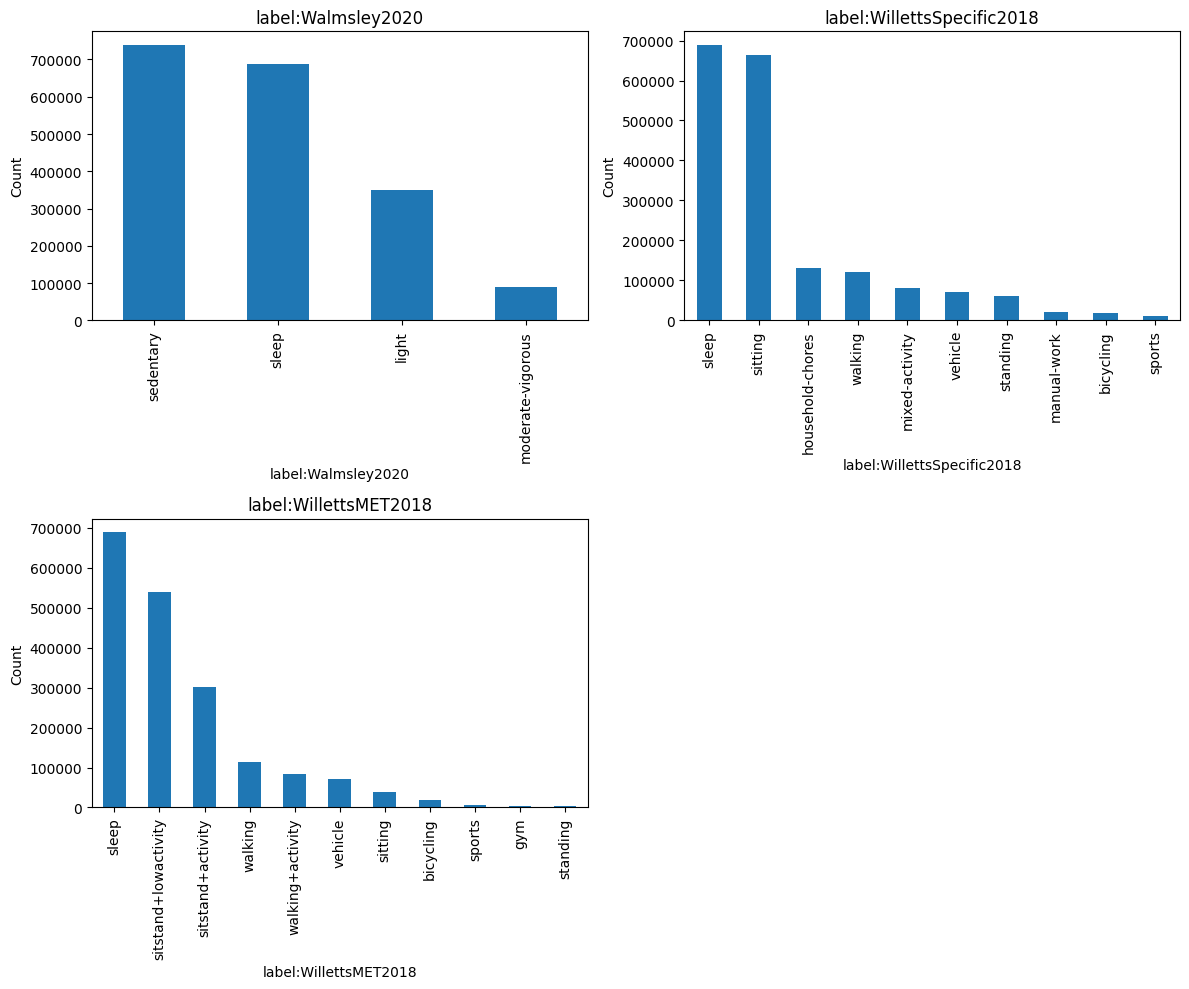

In [11]:
# Checar categorias de cada Label

cols = ["label:Walmsley2020", "label:WillettsSpecific2018", "label:WillettsMET2018"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, col in enumerate(cols):
    df[col].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Count")

# Remove o 4º subplot vazio
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

In [20]:
counting_categories = df["label:Walmsley2020_enc"].value_counts(normalize=True)
counting_categories

label:Walmsley2020_enc
2    0.395844
3    0.369037
0    0.187370
1    0.047749
Name: proportion, dtype: float64

In [55]:
feat_cols = [c for c in df.columns if c.startswith(("x_", "y_", "z_", "mag_", "psd_"))]

df[feat_cols].describe()

,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max
count,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.602107,5.249816e-03,-0.612562,-0.587443,-0.412210,0.005280,-0.422726,-0.398027,0.420894,0.005229,0.409442,0.432563
std,0.346039,1.648029e-02,0.348830,0.354746,0.202426,0.020296,0.207147,0.218134,0.312492,0.010218,0.311150,0.314417
min,-0.965881,1.110223e-16,-1.765033,-0.951957,-0.693353,0.000000,-1.996135,-0.673411,-0.035483,0.000000,-0.511361,-0.019919
25%,-0.951799,1.977769e-03,-0.967281,-0.936249,-0.522429,0.001390,-0.533364,-0.517780,-0.003554,0.002450,-0.004323,0.011072
50%,-0.477811,4.253194e-03,-0.482270,-0.466626,-0.505897,0.004173,-0.517817,-0.502237,0.662483,0.004605,0.658572,0.674068
75%,-0.466030,6.501276e-03,-0.466626,-0.450919,-0.330783,0.006514,-0.330972,-0.315410,0.687805,0.006912,0.674068,0.689664
max,0.136951,3.639569e-01,0.127761,1.019501,0.463650,0.456682,0.462560,1.380674,0.839062,0.271113,0.812625,1.305471


(OBSERVAÇOES) Valores mínimo e máximo

Para dados de acelerômetro normalizados (0–1 g típico):

x_min = -1.76 → **isso é suspeito, excede o normal → pode indicar sensor mal calibrado ou queda**.

x_max = 1.02 → normal.

Mesma coisa para y e z:

z_max = 1.30 → ok

y_min = -1.99 → **fora do esperado → possível erro de registro.**

Valores além de ±2g NÃO são comuns em atividades cotidianas.

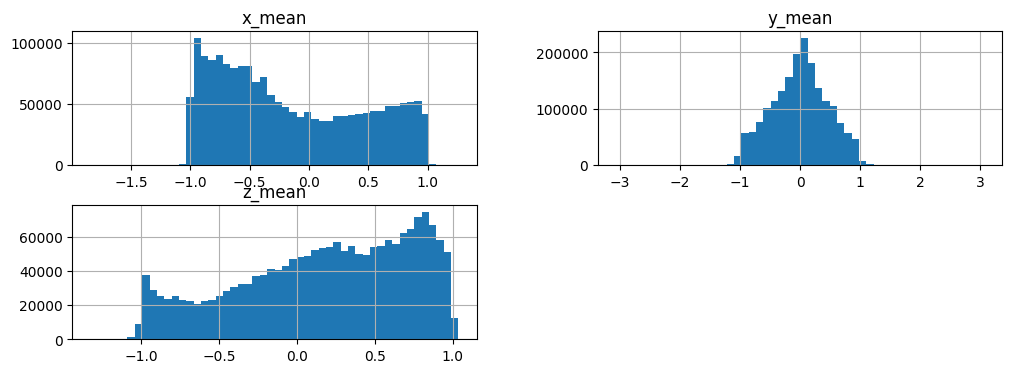

In [12]:
df[["x_mean","y_mean","z_mean"]].hist(bins=50, figsize=(12,4));

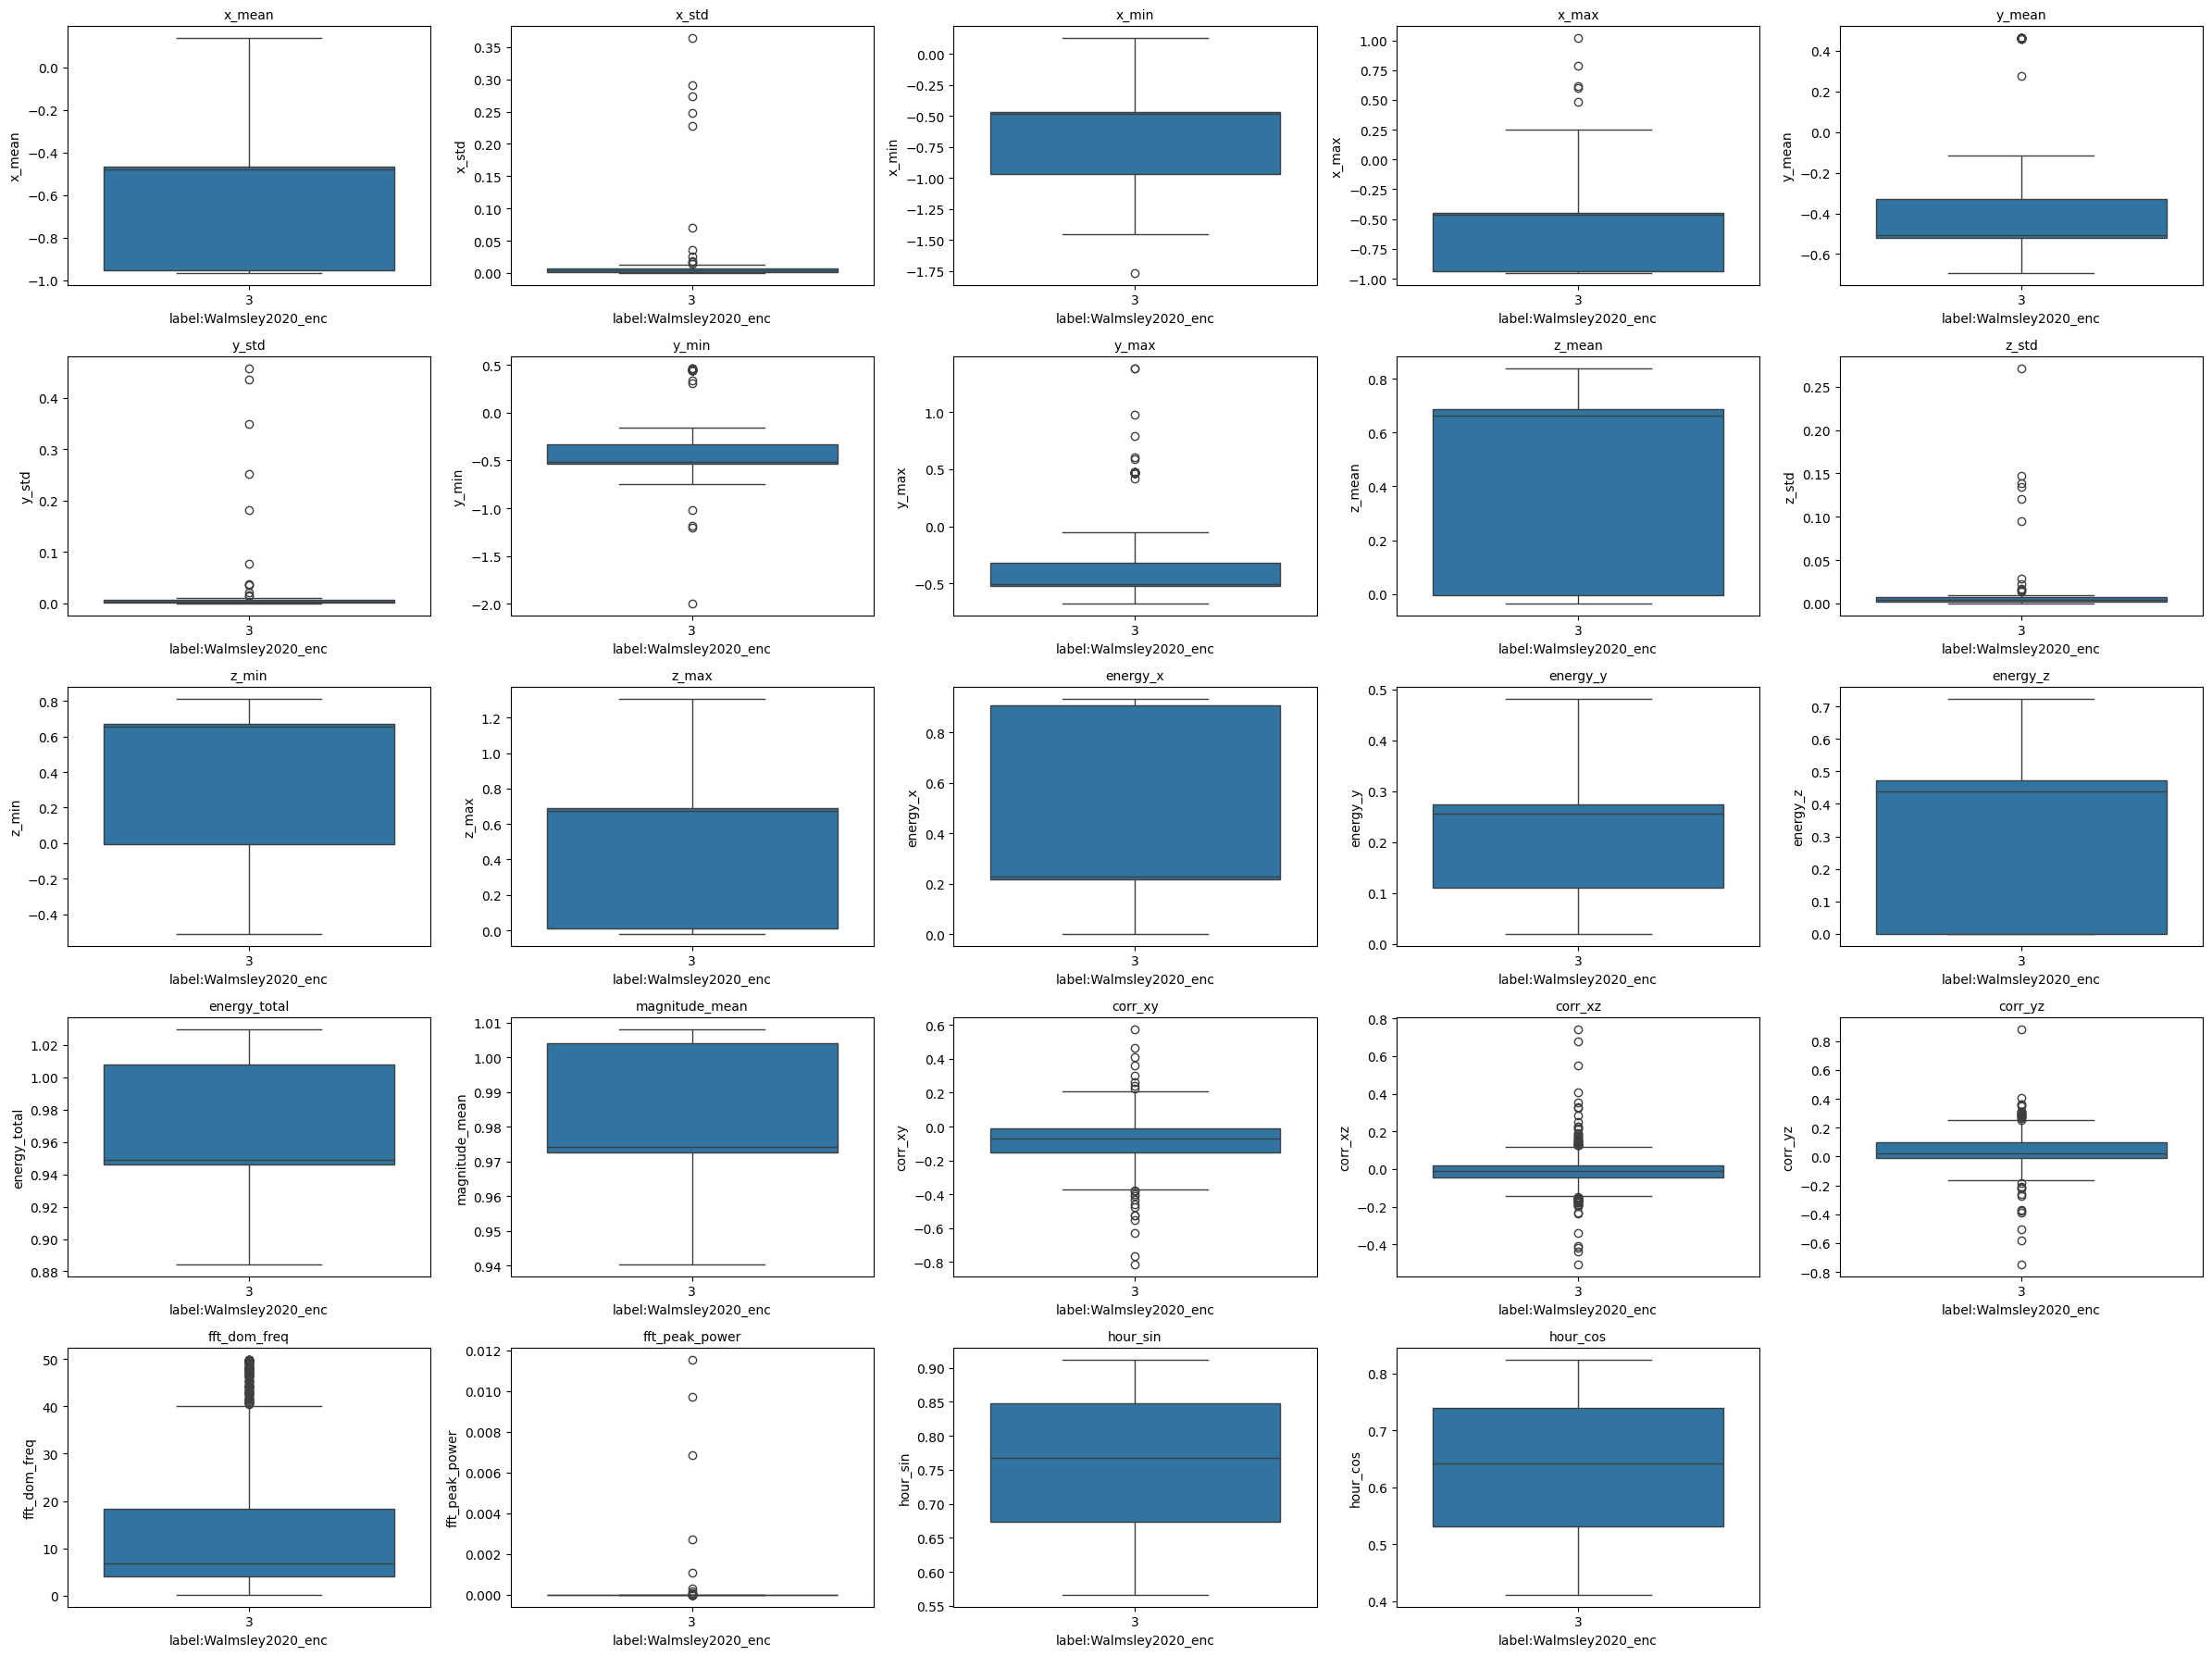

In [65]:
features_box = [
    "x_mean", "x_std", "x_min", "x_max",
    "y_mean", "y_std", "y_min", "y_max",
    "z_mean", "z_std", "z_min", "z_max",
    "energy_x", "energy_y", "energy_z", "energy_total",
    "magnitude_mean",
    "corr_xy", "corr_xz", "corr_yz",
    "fft_dom_freq", "fft_peak_power",
    "hour_sin", "hour_cos"
]

# tamanho do grid
rows = 5
cols = 5  # 25 subplots para sobrar espaço
fig, axes = plt.subplots(rows, cols, figsize=(24, 18))

axes = axes.flatten()

for i, feat in enumerate(features_box):
    sns.boxplot(data=df, x="label:Walmsley2020_enc", y=feat, ax=axes[i])
    axes[i].set_title(f"{feat}", fontsize=10)

# Apagar subplots vazios
for j in range(i+1, rows*cols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

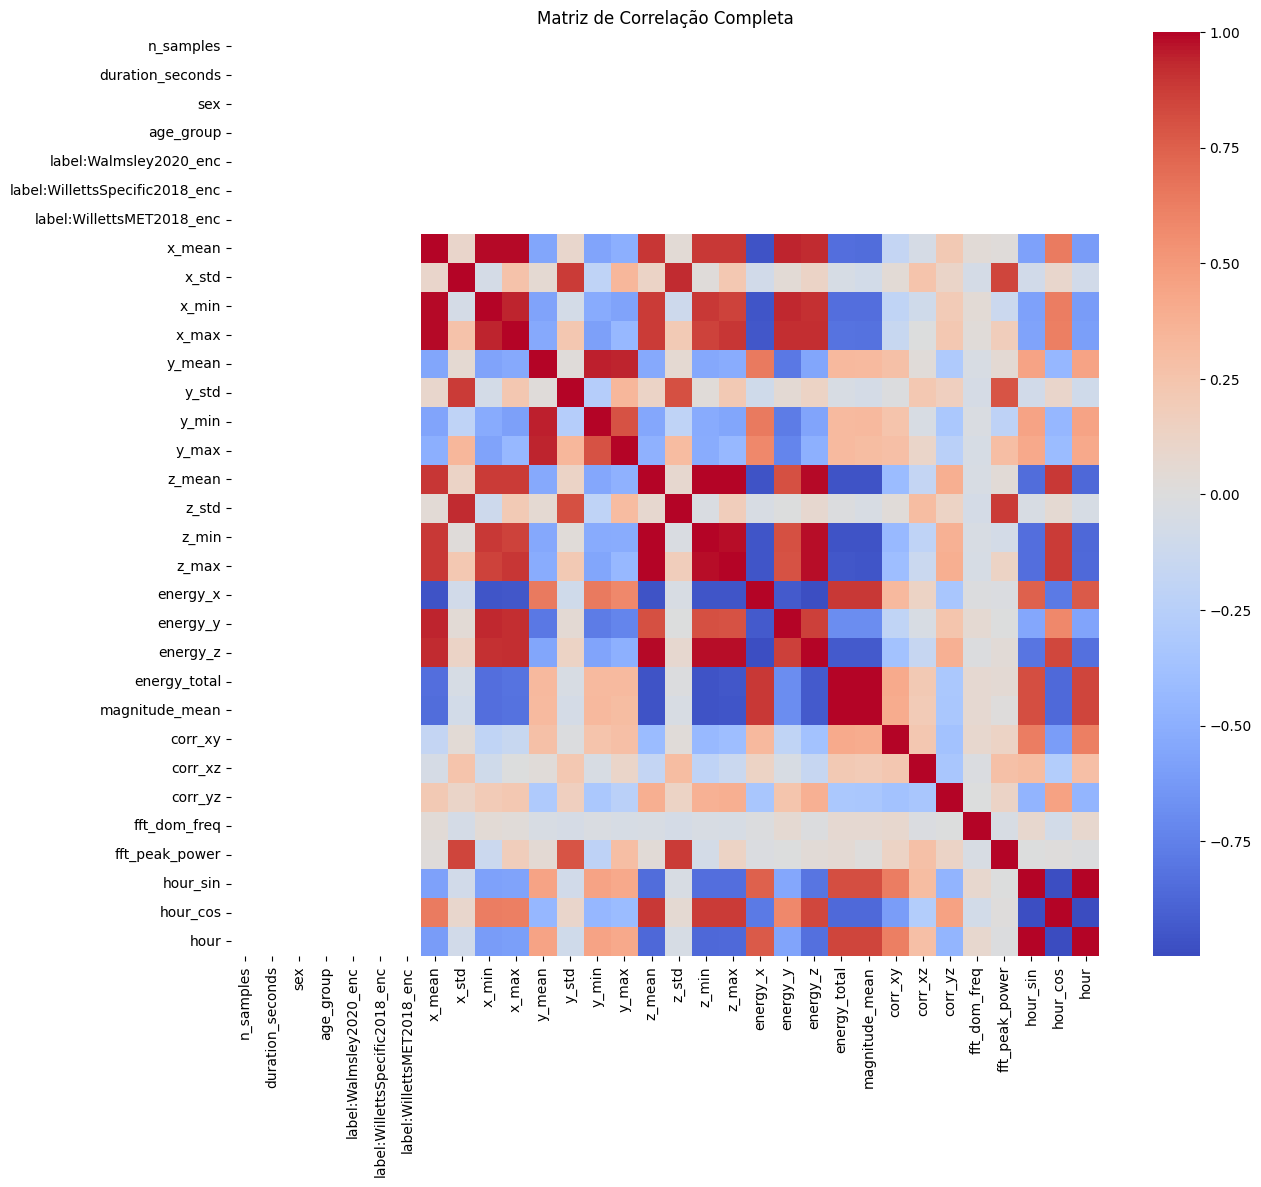

In [66]:
plt.figure(figsize=(14,12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação Completa")
plt.show()

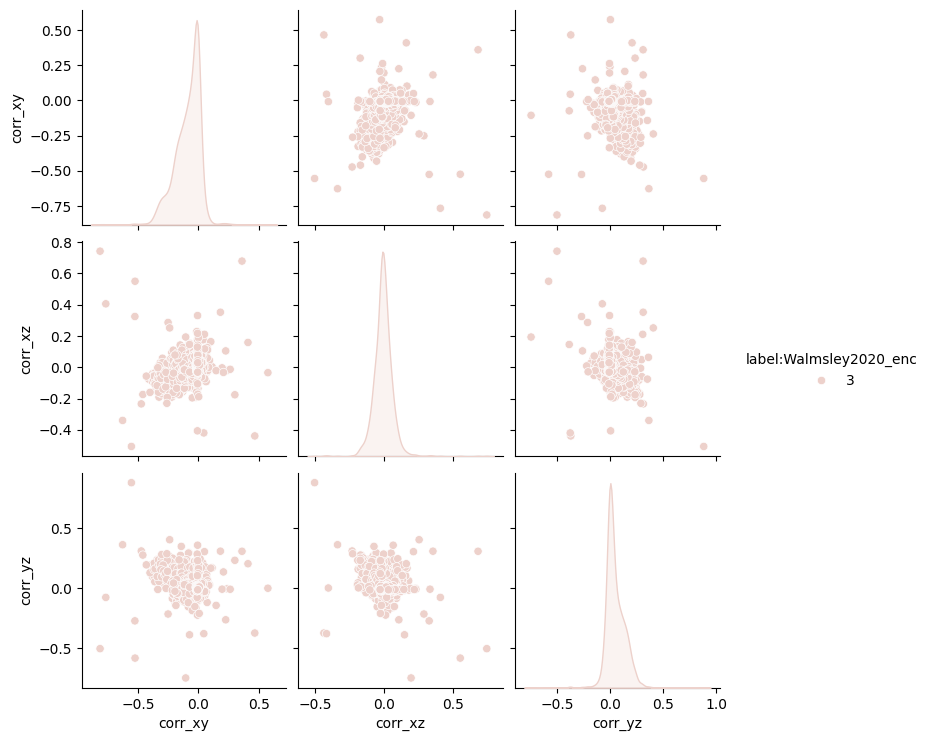

In [67]:
sns.pairplot(df[["corr_xy", "corr_xz", "corr_yz", "label:Walmsley2020_enc"]],
             hue="label:Walmsley2020_enc")
plt.show()